# Exploring DANDI:000617 - Allen Institute Openscope Sequence Learning Project

This notebook introduces DANDI:000617 and demonstrates how to access and visualize the two-photon calcium imaging data from the Allen Institute's Sequence Learning Project. The data contains neural recordings from mouse visual cortex during presentation of repeating movie sequences.

**Note:** This notebook was generated with the assistance of AI. Please exercise caution when interpreting the code or results.

## Overview of the Dandiset

This Dandiset contains experimental data investigating predictive computations in the mouse neocortex. Using two-photon calcium imaging, researchers recorded neural responses as mice viewed sequences of natural movie clips to understand how repeated exposure enables neural circuits to predict future sensory input.

**Key experimental features:**
- Mice viewed repeating sequences of three 2-second natural movie clips ('A', 'B', 'C') interleaved with gray screens ('X')
- Recordings from multiple sessions: pre-training (random order), training (sequence learning), and post-training
- Calcium imaging from eight fields-of-view per session, covering layers 2/3 and 4 in visual areas (V1, LM, AM, PM)
- Mouse line expressing GCaMP6f in excitatory neurons
- 13 mice with over 1100 NWB files total

**Dandiset Link:** https://dandiarchive.org/dandiset/000617/0.250312.0130

## Required Packages

The following packages are required to run this notebook (assumed to be already installed):
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `matplotlib`
- `numpy`
- `pandas`
- `skimage`

In [1]:
# Import required packages
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import islice
from skimage.measure import find_contours

## Accessing Dandiset Metadata

In [2]:
# Connect to DANDI and get dandiset metadata
client = DandiAPIClient()
dandiset = client.get_dandiset("000617", "0.250312.0130")
metadata = dandiset.get_raw_metadata()

print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata.get('description', 'N/A')}")
print(f"License: {metadata.get('license', 'N/A')}")

Dandiset name: Allen Institute Openscope - Sequence Learning Project
Dandiset URL: https://dandiarchive.org/dandiset/000617/0.250312.0130
Description: Adaptive and coordinated behavior requires that an animal be able to make predictions about the near and even far future. This intuition that some neural computations should be ‘predictive’ in their character has a long history, starting with ideas about how the receptive field structure of retinal ganglion cells relate to the statistics of natural visual scenes. Ideas about predictive computation have been most influential in thinking about the function of the neocortex. Here, the relatively stereotyped local circuitry of the neocortex has long led to speculation that each local circuit might be carrying out a somewhat similar, fundamental computation on its specific inputs. In addition, the organization of sensory-motor pathways into hierarchies (e.g., V1, V2, V4, IT in the ventral visual stream) with stereotyped feedforward and feedba

## Exploring NWB Files in the Dandiset

In [3]:
# List example NWB files to understand the directory structure
assets = dandiset.get_assets_by_glob("*.nwb")
example_files = list(islice(assets, 10))

print("Example NWB files in DANDI:000617 (first 10):\n")
print("| # | Path | Size (MB) |")
print("|---|------|-----------|\n")
for i, asset in enumerate(example_files):
    size_mb = asset.size / 1e6
    print(f"| {i+1} | {asset.path} | {size_mb:.1f} |")

print("\nEach file represents one session and field-of-view.")

Example NWB files in DANDI:000617 (first 10):

| # | Path | Size (MB) |
|---|------|-----------|

| 1 | sub-684475/sub-684475_ses-1294084428-acq-1294179945-raw-movies_ophys.nwb | 21166.3 |
| 2 | sub-684475/sub-684475_ses-1294084428-acq-1294179943-raw-movies_ophys.nwb | 21161.4 |
| 3 | sub-684475/sub-684475_ses-1293785946-acq-1293914859-raw-movies_ophys.nwb | 21174.8 |
| 4 | sub-684475/sub-684475_ses-1294084428-acq-1294179942-raw-movies_ophys.nwb | 21157.7 |
| 5 | sub-684475/sub-684475_ses-1294259213-acq-1294370666-raw-movies_ophys.nwb | 21179.6 |
| 6 | sub-684475/sub-684475_ses-1294259213-acq-1294370664-raw-movies_ophys.nwb | 21178.5 |
| 7 | sub-684475/sub-684475_ses-1293785946-acq-1293914856-raw-movies_ophys.nwb | 21203.0 |
| 8 | sub-684475/sub-684475_ses-1294259213-acq-1294370663-raw-movies_ophys.nwb | 21155.1 |
| 9 | sub-684475/sub-684475_ses-1293785946-acq-1293914853-raw-movies_ophys.nwb | 21160.0 |
| 10 | sub-684475/sub-684475_ses-1293785946-acq-1293914860-raw-movies_ophys.nwb | 2

## Loading and Exploring an Example NWB File

We'll load one representative file to understand the data structure. Files are organized by subject, session, and acquisition details.

In [4]:
# Stream an example NWB file without downloading
asset_path = "sub-684475/sub-684475_ses-1294084428-acq-1294179945-raw-movies_ophys.nwb"
asset = next(dandiset.get_assets_by_glob(asset_path))

# Open file remotely using remfile and h5py
remote_file = remfile.File(asset.download_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Basic file information
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject age: {nwb.subject.age}")
print(f"Subject genotype: {nwb.subject.genotype}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.3.0, loaded version: 2.8.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


Session description: Ophys Session
Session start time: 2023-08-31 20:49:56.751000+00:00
Subject ID: 684475
Subject age: P108.0D
Subject genotype: Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt


## Understanding the NWB File Structure

The file contains several main sections:
- **Acquisition**: Raw imaging data, eye tracking, and running wheel signals
- **Processing modules**: Processed data including fluorescence traces, segmentation, and stimulus timing
- **Intervals**: Stimulus presentation timing for each movie clip type

In [5]:
# Explore main sections of the NWB file
print("Main acquisition data:")
for key in nwb.acquisition.keys():
    print(f"  - {key}")

print("\nProcessing modules:")
for key in nwb.processing.keys():
    print(f"  - {key}")
    
print("\nInterval tables (stimulus presentations):")
for key in nwb.intervals.keys():
    print(f"  - {key}")

Main acquisition data:
  - EyeTracking
  - raw_suite2p_motion_corrected
  - v_in
  - v_sig

Processing modules:
  - ophys
  - running
  - stimulus
  - stimulus_ophys

Interval tables (stimulus presentations):
  - gray_presentations
  - movie_clip_A_presentations
  - movie_clip_B_presentations
  - movie_clip_C_presentations


## Cell Segmentation and ROI Information

In [6]:
# Access cell segmentation table
seg_table = nwb.processing['ophys'].data_interfaces['image_segmentation'].plane_segmentations['cell_specimen_table']
cells_df = seg_table.to_dataframe()
n_cells = len(cells_df)

print(f"Number of segmented ROIs/cells: {n_cells}")
print(f"\nSegmentation table columns: {list(cells_df.columns)}")
print(f"\nExample cell data:")
print(cells_df[['height', 'width', 'x', 'y', 'valid_roi']].head())

# Display imaging plane information
im_plane = seg_table.imaging_plane
print(f"\nImaging plane information:")
print(f"  Location: {im_plane.location}")
print(f"  Description: {im_plane.description}")
print(f"  Excitation wavelength: {im_plane.excitation_lambda} nm")
print(f"  Indicator: {im_plane.indicator}")
print(f"  Imaging rate: {im_plane.imaging_rate} Hz")

Number of segmented ROIs/cells: 18

Segmentation table columns: ['cell_specimen_id', 'height', 'mask_image_plane', 'max_correction_down', 'max_correction_left', 'max_correction_right', 'max_correction_up', 'valid_roi', 'width', 'x', 'y', 'image_mask']

Example cell data:
            height  width    x    y  valid_roi
id                                            
1294200207      18     19   60  470       True
1294200209      22     20  217  442       True
1294200210      17     22  298  477       True
1294200212      15     16   46  379       True
1294200216      17     26  108  366       True

Imaging plane information:
  Location: VISpm
  Description: (512, 512) field of view in VISpm at depth 271 um
  Excitation wavelength: 910.0 nm
  Indicator: GCaMP6f
  Imaging rate: 10.0 Hz


## Visualizing Cell Locations

We'll display the mean projection image to show the imaging field of view. Note that ROI mask overlays may not perfectly align with the projection image due to coordinate system differences in the processing pipeline.

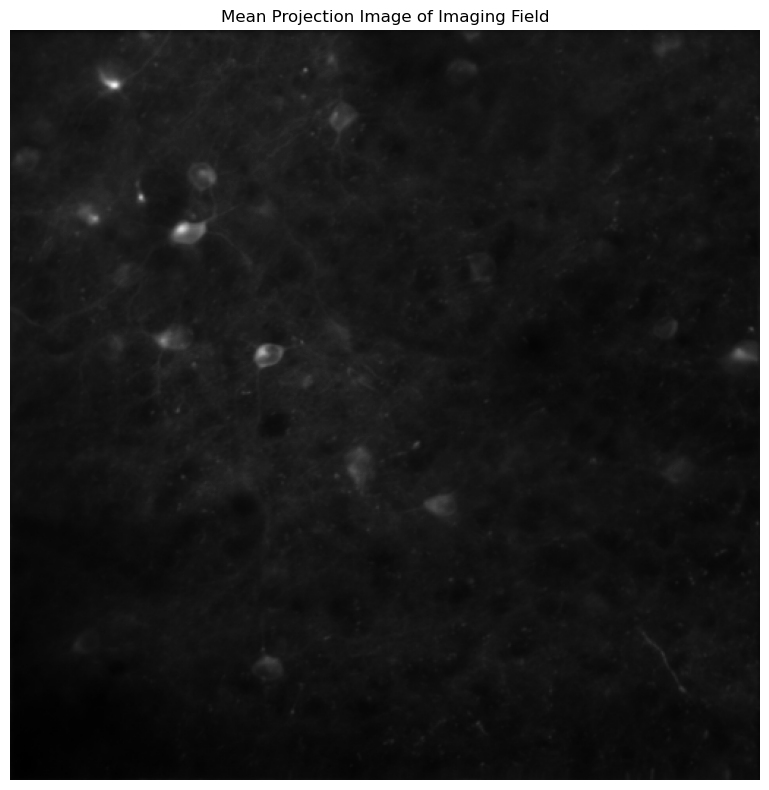

Image dimensions: 512 x 512 pixels
Note: ROI mask coordinates may not perfectly align with this image due to processing pipeline transformations.


In [7]:
# Get mean projection image for reference
images = nwb.processing['ophys'].data_interfaces['images']
avg_img = images.images['average_image'].data[:]

# Display the mean projection image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(avg_img, cmap='gray', origin='lower')
ax.set_title('Mean Projection Image of Imaging Field')
ax.axis('off')
plt.tight_layout()
plt.show()

print(f"Image dimensions: {avg_img.shape[0]} x {avg_img.shape[1]} pixels")
print("Note: ROI mask coordinates may not perfectly align with this image due to processing pipeline transformations.")

## Calcium Activity Traces (ΔF/F)

The processed fluorescence data provides ΔF/F traces for each segmented cell, representing calcium activity over time.

ΔF/F data shape: (18, 40018) (cells x timepoints)
Recording duration: 4204.4 seconds
Sampling rate: ~9.5 Hz


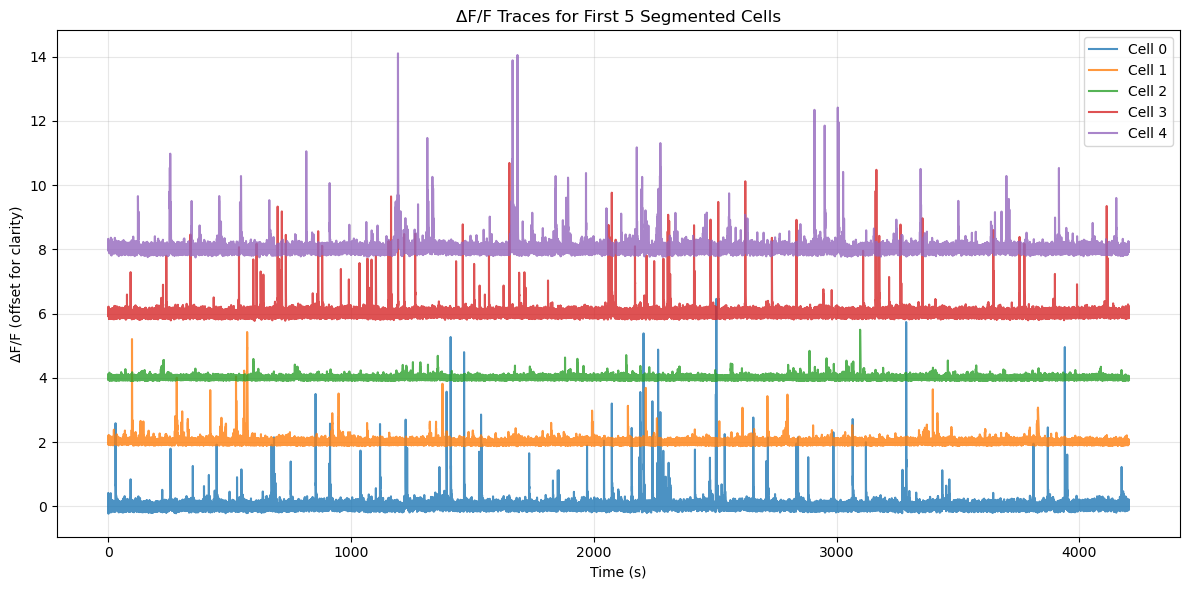

In [8]:
# Extract ΔF/F traces and timestamps
dff = nwb.processing['ophys'].data_interfaces['dff'].roi_response_series['traces']
dff_data = dff.data[:, :].T  # shape: n_cells x n_timepoints
timestamps = dff.timestamps[:]
time = timestamps - timestamps[0]  # start from 0

print(f"ΔF/F data shape: {dff_data.shape} (cells x timepoints)")
print(f"Recording duration: {time[-1]:.1f} seconds")
print(f"Sampling rate: ~{len(time)/time[-1]:.1f} Hz")

# Plot traces for first 5 cells with vertical offset for clarity
n_plot = min(5, dff_data.shape[0])
plt.figure(figsize=(12, 6))
offset = 2  # vertical offset between traces
for i in range(n_plot):
    plt.plot(time, dff_data[i] + i*offset, label=f'Cell {i}', alpha=0.8)
    
plt.xlabel('Time (s)')
plt.ylabel('ΔF/F (offset for clarity)')
plt.title('ΔF/F Traces for First 5 Segmented Cells')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Stimulus Presentation Structure

The experiment includes four types of stimuli: gray screens and three different movie clips (A, B, C). Each has its own interval table with timing information.

In [9]:
# Examine stimulus presentation structure
stim_names = ['gray_presentations', 'movie_clip_A_presentations', 
              'movie_clip_B_presentations', 'movie_clip_C_presentations']

# Get total presentation counts for each stimulus
tbl_summary = {}
for name in stim_names:
    tbl_summary[name] = len(nwb.intervals[name])
    
print("Total presentation counts for each stimulus:")
for name, count in tbl_summary.items():
    print(f"  {name}: {count:,}")

Total presentation counts for each stimulus:
  gray_presentations: 63,000
  movie_clip_A_presentations: 63,000
  movie_clip_B_presentations: 63,000
  movie_clip_C_presentations: 63,000


## Visualizing Stimulus Timing

We'll plot the timing of stimulus presentations to understand the experimental structure. Due to the large number of presentations, we'll show only the first 100 intervals for clarity.

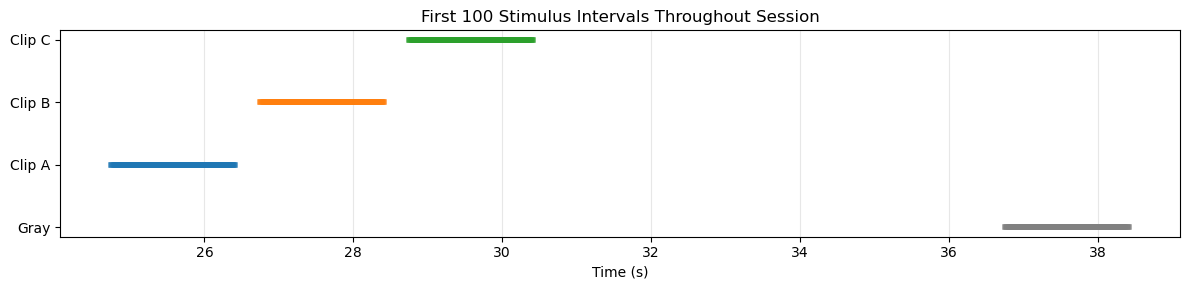

In [10]:
# Plot stimulus intervals timeline (first 100 for visualization)
stim_colors = ['gray', 'tab:blue', 'tab:orange', 'tab:green']
stim_labels = ['Gray', 'Clip A', 'Clip B', 'Clip C']

fig, ax = plt.subplots(figsize=(12, 3))
yoff = 0

for stim_name, color, label in zip(stim_names, stim_colors, stim_labels):
    tbl = nwb.intervals[stim_name]
    n_plot = min(len(tbl), 100)  # Plot first 100 intervals
    starts = tbl['start_time'].data[:n_plot]
    stops = tbl['stop_time'].data[:n_plot]
    
    # Plot presentation periods as horizontal bars
    for s, e in zip(starts, stops):
        ax.plot([s, e], [yoff, yoff], color=color, lw=4, alpha=0.8)
    yoff += 1

ax.set_yticks(range(len(stim_names)))
ax.set_yticklabels(stim_labels)
ax.set_xlabel('Time (s)')
ax.set_title('First 100 Stimulus Intervals Throughout Session')
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## Accessing Behavioral Data

The dataset includes running wheel data to track the animal's locomotion during the session.

Running speed data shape: (252000,)
Speed range: -7.0 to 6.4 cm/s
Mean speed: 0.0 cm/s


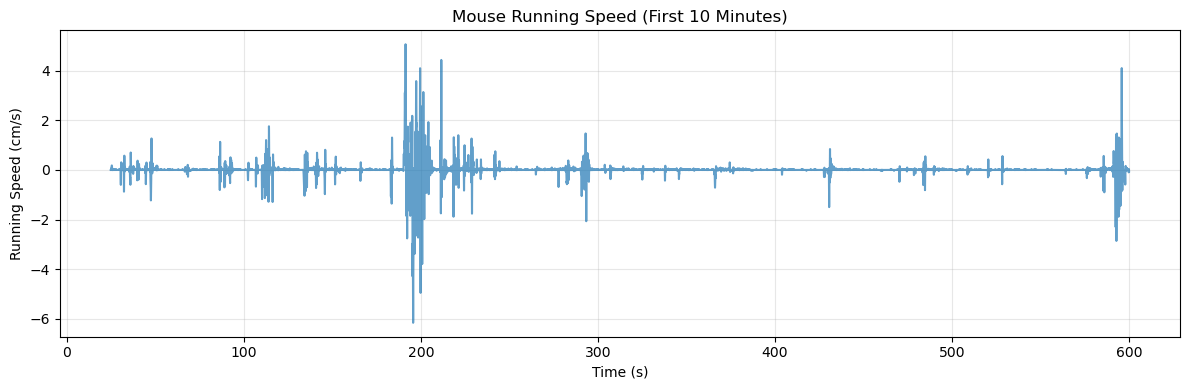

In [11]:
# Extract and display running speed data
speed_data = nwb.processing['running'].data_interfaces['speed']
speed_values = speed_data.data[:]
speed_time = speed_data.timestamps[:]

print(f"Running speed data shape: {speed_values.shape}")
print(f"Speed range: {np.min(speed_values):.1f} to {np.max(speed_values):.1f} cm/s")
print(f"Mean speed: {np.mean(speed_values):.1f} cm/s")

# Plot running speed over a subset of time for visualization
time_subset = speed_time < 600  # first 10 minutes
plt.figure(figsize=(12, 4))
plt.plot(speed_time[time_subset], speed_values[time_subset], alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Running Speed (cm/s)')
plt.title('Mouse Running Speed (First 10 Minutes)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Event Detection Data

In addition to raw ΔF/F traces, the dataset includes detected calcium events, which represent inferred neural activity.

Event detection data shape: (40018, 18)
Event detection parameters available:
  - lambdas: [0.0287 0.0128 0.0086 0.0289 0.0335]... (first 5 cells)
  - noise_stds: [0.06418523 0.04296032 0.03497644 0.06435245 0.06978224]... (first 5 cells)


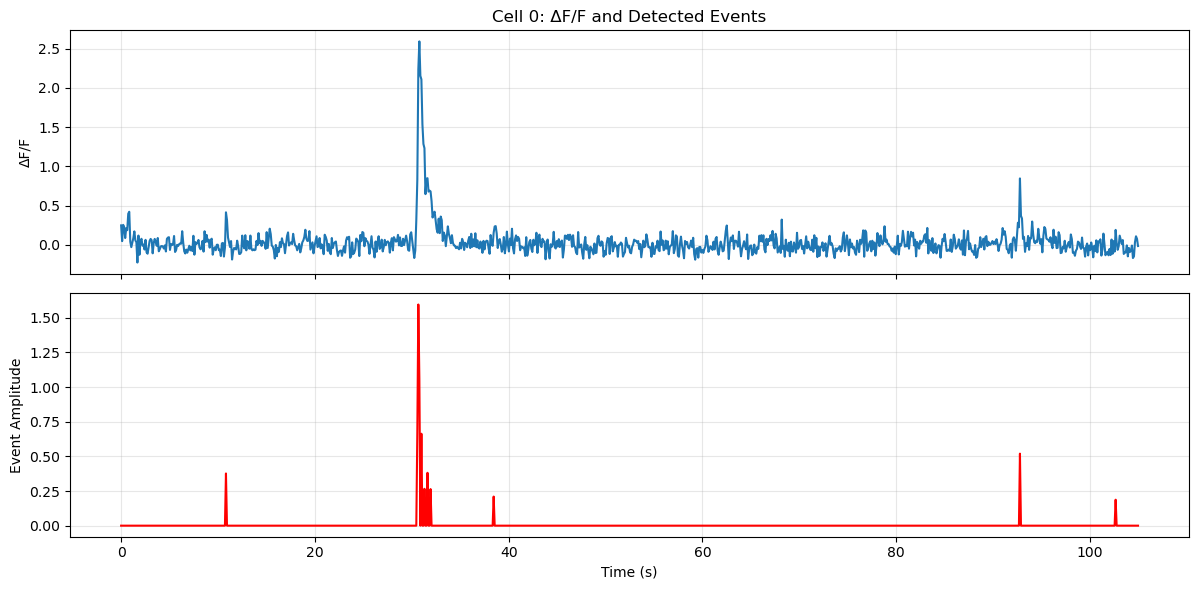

In [12]:
# Access event detection data
event_detection = nwb.processing['ophys'].data_interfaces['event_detection']
event_data = event_detection.data[:, :]  # shape: time x cells
event_timestamps = event_detection.timestamps[:]

print(f"Event detection data shape: {event_data.shape}")
print(f"Event detection parameters available:")
print(f"  - lambdas: {event_detection.lambdas[:5]}... (first 5 cells)")
print(f"  - noise_stds: {event_detection.noise_stds[:5]}... (first 5 cells)")

# Plot event detection for first cell alongside ΔF/F
cell_idx = 0
time_range = slice(0, 1000)  # subset for visualization

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# ΔF/F trace
ax1.plot(time[time_range], dff_data[cell_idx, time_range])
ax1.set_ylabel('ΔF/F')
ax1.set_title(f'Cell {cell_idx}: ΔF/F and Detected Events')
ax1.grid(True, alpha=0.3)

# Event detection
ax2.plot(time[time_range], event_data[time_range, cell_idx], color='red')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Event Amplitude')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary and Next Steps

This notebook has introduced the key data structures and access patterns for DANDI:000617. The dataset provides rich multi-modal data including:

- **Neural activity**: ΔF/F traces and event detection for segmented cells
- **Stimulus information**: Detailed timing and properties of visual stimuli  
- **Behavioral data**: Running speed and eye tracking
- **Metadata**: Cell locations, imaging parameters, and experimental context

**Suggested analyses:**
- Align neural responses to stimulus onsets for trial-based analysis
- Compare activity patterns across different movie clips and learning phases
- Analyze population dynamics and cell-to-cell correlations
- Relate neural activity to behavioral state (running vs. stationary)
- Investigate predictive coding signatures in sequence learning

The streaming data access demonstrated here allows efficient exploration without downloading large files locally.